# demo networkx graph tool

In [22]:
>>> import networkx as nx
>>> g = nx.Graph() # empty graph

In [23]:
>>> g.add_node(1)
# A list of nodes
>>> g.add_nodes_from([2, 3])
# A container of nodes
>>> h = nx.path_graph(5)
>>> g.add_nodes_from(h)
# You can also remove any node of the graph
# g.remove_node(2)

In [24]:
g.nodes()

[0, 1, 2, 3, 4]

In [25]:
print nx.path_graph.__doc__

Return the Path graph P_n of n nodes linearly connected by n-1 edges.

    Node labels are the integers 0 to n - 1.
    If create_using is a DiGraph then the edges are directed in
    increasing order.

    


In [26]:
#A node can be any hashable object such as a string, a function, a file and more.
>>> import math
>>> g.add_node('string')
>>> g.add_node(math.cos) # cosine function
>>> f = open('temp.txt', 'w') # file handle
>>> g.add_node(f)
>>> print g.nodes()



[0, 1, 2, 3, 4, 'string', <built-in function cos>, <open file 'temp.txt', mode 'w' at 0x0000000008FAEA50>]


In [27]:
# Single edge
>>> g.add_edge(1, 2)
>>> e = (2, 3)
>>> g.add_edge(*e) # unpack tuple
# List of edges
>>> g.add_edges_from([(1, 2), (1, 3)])
# A container of edges
>>> g.add_edges_from(h.edges())
# You can also remove any edge
>>> g.remove_edge(1, 2)


In [28]:
>>> g.add_edges_from([(1, 2), (1, 3)])
>>> g.add_node('a')
>>> g.number_of_nodes() # also g.order()

>>> g.number_of_edges() # also g.size()

>>> g.nodes()

>>> g.edges()
>>> g.neighbors(1)
>>> g.degree(1)


3

In [29]:
#useful dictiionary operations
# Keys and values can be of any data type
fruit_dict = {'apple': 1, 'orange': [0.12, 0.02], 42: True}
# Can retrieve the keys and values as Python lists (vector)
fruit_dict.keys()
#['orange', 42, 'apple']
# Or (key, value) tuples
fruit_dict.items()
#[('orange', [0.12, 0.02]), (42, True), ('apple', 1)]
# This becomes especially useful when you master Python list
#comprehension

[('orange', [0.12, 0.02]), (42, True), ('apple', 1)]

In [30]:
#Any NetworkX graph behaves like a Python dictionary with nodes as primary keys
#(for access only!)
# The special edge attribute weight should always be numeric and holds values
#used by algorithms requiring weighted edges.
g.add_node(1, time='10am')
g.node[1]['time']
#10am
g.node[1] # Python dictionary
#{'time': '10am'}
g.add_edge(1, 2, weight=4.0)
g[1][2]['weight'] = 5.0 # edge already added
print g[1][2]
#{'weight': 5.0}
print g[1][2]['weight']

{'weight': 5.0}
5.0


In [31]:
# Node iteration
# Edge iteration
g.add_edge(1, 2)
for node in g.nodes(): # or node in g.nodes_iter():
    print node, g.degree(node)

print '=================='

g.add_edge(1, 3, weight=2.5)
g.add_edge(2, 3, weight=2.5)
g.add_edge(1, 2, weight=1.5)
g.add_edge(0, 1, weight=2)
g.add_edge(4, 3, weight=2.5)
for n1, n2, attr in g.edges(data=True): # unpacking
    print n1, n2, attr['weight']



0 1
1 3
2 2
3 3
4 1
string 0
<built-in function cos> 0
a 0
<open file 'temp.txt', mode 'w' at 0x0000000008FAEA50> 0
0 1 2
1 2 1.5
1 3 2.5
2 3 2.5
3 4 2.5


In [32]:
g.add_edge(9, 10, weight=2.5)

In [33]:
g.edges()

[(0, 1), (1, 2), (1, 3), (2, 3), (3, 4), (9, 10)]

In [15]:
%matplotlib inline

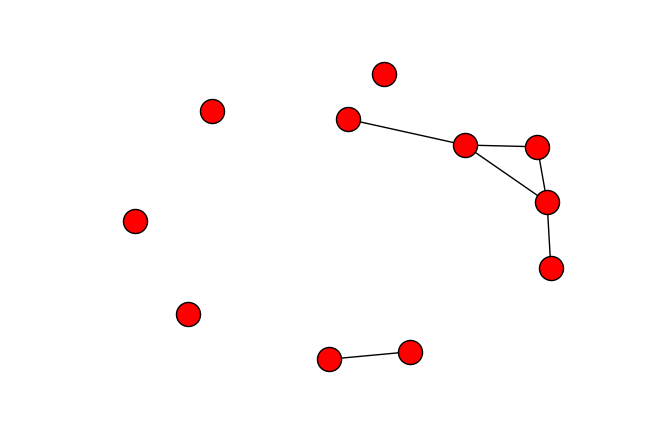

In [34]:
nx.draw(g)

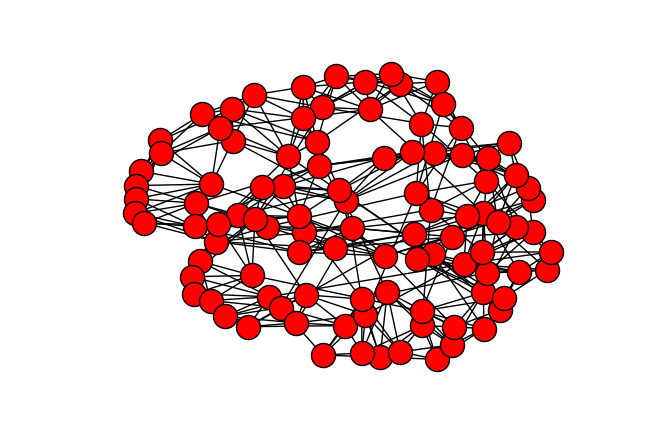

In [18]:
>>> import pylab as plt
>>> g = nx.watts_strogatz_graph(100, 8, 0.1)
>>> nx.draw(g)

# plt.savefig('graph.png')

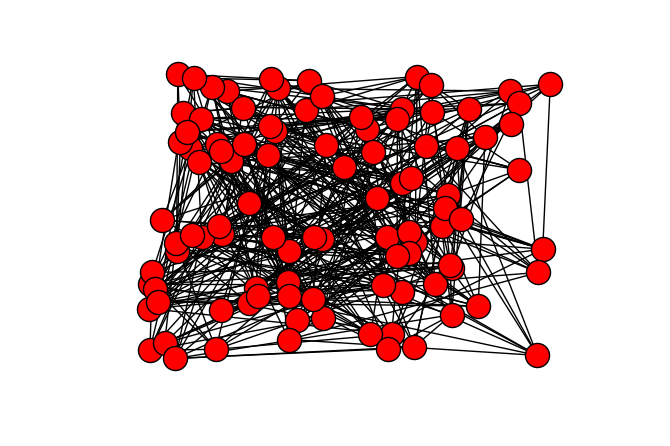

In [19]:
>>> nx.draw_random(g)


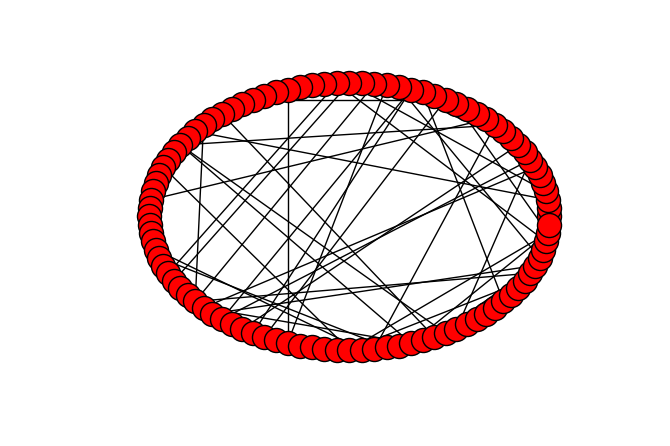

In [20]:
>>> nx.draw_circular(g)


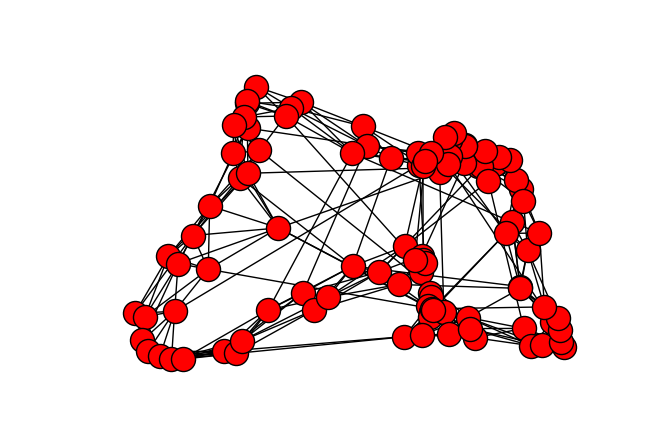

In [21]:
>>> nx.draw_spectral(g)

## a real-world data case

In [35]:
#https://www.cl.cam.ac.uk/teaching/1314/L109/materials.html

cam_net= nx.read_edgelist('dataset/cambridge_net.txt', create_using=nx.DiGraph(), nodetype=int)
N, K = cam_net.order(), cam_net.size()
avg_deg= float(K) / N
print "Nodes: ", N
print "Edges: ", K
print "Average degree: ", avg_deg
print "SCC: ", nx.number_strongly_connected_components(cam_net)
print "WCC: ", nx.number_weakly_connected_components(cam_net)

Nodes:  912
Edges:  3496
Average degree:  3.83333333333
SCC:  175
WCC:  25


(1.0, 200)

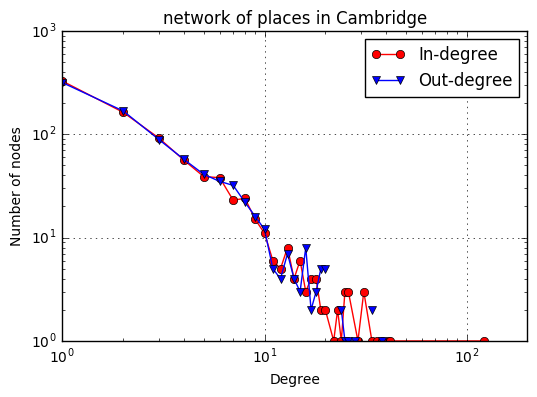

In [42]:
#Calculate in (and out) degrees of a directed graph
#Then use matplotlib(pylab) to plot the degree distribution
in_degrees= cam_net.in_degree() # dictionary node:degree
in_values= sorted(set(in_degrees.values()))
in_hist= [in_degrees.values().count(x) for x in in_values]
out_degrees= cam_net.out_degree() # dictionary node:degree
out_values= sorted(set(out_degrees.values()))
out_hist= [out_degrees.values().count(x) for x in in_values]
plt.figure() # you need to first do 'import pylab as plt'
plt.grid(True)
#plt.plot(in_values, in_hist, 'ro-') # in-degree
#plt.plot(out_values, out_hist, 'bv-') # out-degree
plt.loglog(in_values, in_hist, 'ro-') # in-degree
plt.loglog(out_values, out_hist, 'bv-') # out-degree
plt.legend(['In-degree', 'Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('network of places in Cambridge')
plt.xlim([0, 2*10**2])
#plt.savefig('./output/cam_net_degree_distribution.pdf')
#plt.close()

In [43]:
cam_net_ud= cam_net.to_undirected()
# Clustering coefficient of node 0
print nx.clustering(cam_net_ud, 0)
# Clustering coefficient of all nodes (in a dictionary)
clust_coefficients= nx.clustering(cam_net_ud)
# Average clustering coefficient
avg_clust= sum(clust_coefficients.values()) / len(clust_coefficients)
print avg_clust
# Or use directly the built-in method
print nx.average_clustering(cam_net_ud)

0.0599033816425
0.156643336924
0.156643336924


In [44]:
#We can get the clustering coefficient of individual nodes or all the nodes
#(but first we need to convert the graph to an undirected one)
cam_net_ud= cam_net.to_undirected()
# Clustering coefficient of node 0
print nx.clustering(cam_net_ud, 0)
# Clustering coefficient of all nodes (in a dictionary)
clust_coefficients= nx.clustering(cam_net_ud)
# Average clustering coefficient
avg_clust= sum(clust_coefficients.values()) / len(clust_coefficients)
print avg_clust
# Or use directly the built-in method
print nx.average_clustering(cam_net_ud)

0.0599033816425
0.156643336924
0.156643336924


In [45]:
#clustering coefficients https://www.youtube.com/watch?v=K2WF4pT5pFY
#basically you can either compute CC for a node, which characterize how connected is its neighborhood;
#Or, you can do average CC of the graph. 
#in sankalp's case he computed the global CC:
#Before computing CC I had an unweighted network, so without considering the distance between them. 
#It just accounts for connections, basically number of closed triangles divided by number of connected triplets

print clust_coefficients

{0: 0.05990338164251208, 1: 0.08187134502923976, 2: 0.11857707509881422, 3: 0.0, 4: 0.0, 5: 0.047619047619047616, 6: 0.07738095238095238, 7: 0.0, 8: 0.047619047619047616, 9: 0.1471861471861472, 10: 0.06760316066725197, 11: 0.05310734463276836, 12: 1.0, 13: 0.06871035940803383, 14: 0.0639386189258312, 15: 0.09523809523809523, 16: 0.04850964348334307, 17: 0.1111111111111111, 18: 0.13071895424836602, 19: 0.17777777777777778, 20: 0.0, 21: 0.13333333333333333, 22: 0.08866995073891626, 23: 0.11586452762923351, 24: 0.12012012012012012, 25: 0.0, 26: 0.10909090909090909, 27: 0.10526315789473684, 28: 0.21212121212121213, 29: 0.0, 30: 0.175, 31: 0.12121212121212122, 32: 0.06951871657754011, 33: 0.09388335704125178, 34: 0.3055555555555556, 35: 0.07823613086770982, 36: 0.21794871794871795, 37: 0.10294117647058823, 38: 0.08791208791208792, 39: 0.0, 40: 0.09523809523809523, 41: 0.1111111111111111, 42: 0.10989010989010989, 43: 0.25, 44: 0.11074197120708748, 45: 0.026213310084277828, 46: 0.228571428571

In [51]:
#We will first extract the largest connected component and then compute the node centrality measures
# Connected components are sorted in descending order of their size
cam_net_components= nx.connected_component_subgraphs(cam_net_ud)
for cam_net_mc in cam_net_components:
    print cam_net_mc
    # Betweennesscentrality
    bet_cen= nx.betweenness_centrality(cam_net_mc)
    #print bet_cen
    # Closeness centrality
    clo_cen= nx.closeness_centrality(cam_net_mc)
    # Eigenvector centrality
    eig_cen= nx.eigenvector_centrality(cam_net_mc)
    #print clo_cen
    #print eig_cen
    break

In [54]:
def get_top_keys(dictionary, top):
    items = dictionary.items()
    items.sort(reverse=True, key=lambda x: x[1])
    return map(lambda x: x[0], items[:top])
top_bet_cen= get_top_keys(bet_cen,10)
top_clo_cen= get_top_keys(clo_cen,10)
top_eig_cent= get_top_keys(eig_cen,10)


In [55]:
### READ META DATA ###
node_data= {}
for line in open('dataset/cambridge_net_titles.txt'):
    splits = line.split(';')
    node_id= int(splits[0])
    place_title= splits[1]
    lat= float(splits[2])
    lon= float(splits[3])
    node_data[node_id] = (place_title, lat, lon)
print 'Top 10 places for betweennesscentrality:'
for node_id in top_bet_cen:
    print node_data[node_id][0]

Top 10 places for betweennesscentrality:
Cambridge Railway Station (CBG)
Grand Arcade
Cineworld Cambridge
Greens
King's College
Cambridge Market
Grafton Centre
Apple Store
Anglia Ruskin University
Addenbrooke's Hospital


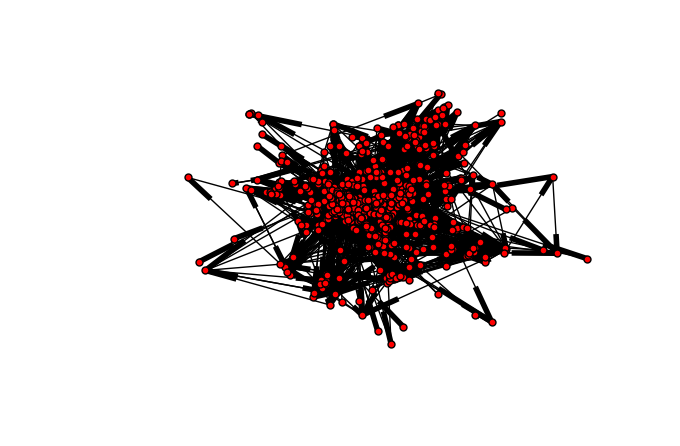

In [60]:
# draw the graph using information about the nodes geographic position
##this is about where to draw the nodes according to its geographic coordinate.
pos_dict= {}
for node_id, node_info in node_data.items():
    pos_dict[node_id] = (node_info[2], node_info[1])
nx.draw(cam_net, pos=pos_dict, with_labels=False, node_size=25)
#plt.savefig('cam_net_graph.pdf')
#plt.close()

In [47]:
cam_net_components

<generator object connected_component_subgraphs at 0x000000000D92B120>